# <b><span style='color:#F1A424'>AutoML - Regression - Medical Insurance Charges Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset Used : Medical insurance Dataset**

**Features**:

- `Age`: The insured person's age.
- `Sex`: Gender (male or female) of the insured.
- `BMI (Body Mass Index)`: A measure of body fat based on height and weight.
- `Children`: The number of dependents covered.
- `Smoker`: Whether the insured is a smoker (yes or no).
- `Region`: The geographic area of coverage.

**Target Variable**:

- `Charges`: The medical insurance costs incurred by the insured person.
    
**Objective**:

The primary objective is typically to build a model that can accurately predict medical insurance costs incurred by the insured person.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Binning on 'age' feature to get 3 different levels.
- Customized target encoding on 'region' feature.
- Train test split with training size 0.9.
- Feature scaling with 'midrange' method.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoRegressor

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','insurance')

In [5]:
# Fetching in teradata dataframe
insurance_df = DataFrame("insurance")

In [6]:
# first 5 rows
insurance_df.head()

age,sex,bmi,children,smoker,region,charges
18,female,20.79,0,no,southeast,1607.5101
18,female,42.24,0,yes,southeast,38792.6856
18,female,31.92,0,no,northeast,2205.9808
18,male,34.43,0,no,southeast,1137.4697
18,male,21.565,0,yes,northeast,13747.87235
18,male,35.2,1,no,southeast,1727.54
18,female,31.35,4,no,northeast,4561.1885
18,male,30.4,3,no,northeast,3481.868
18,female,38.28,0,no,southeast,14133.03775
18,female,33.88,0,no,southeast,11482.63485


In [7]:
# insurance_df dataset
insurance_df.shape

(1338, 7)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
insurance_df_sample = insurance_df.sample(frac = [0.8, 0.2])

In [9]:
insurance_df_sample.head()

age,sex,bmi,children,smoker,region,charges,sampleid
18,male,17.29,2,yes,northeast,12829.4551,1
18,male,41.14,0,no,southeast,1146.7966,1
18,female,42.24,0,yes,southeast,38792.6856,1
18,female,29.165,0,no,northeast,7323.734819,2
18,female,36.85,0,yes,southeast,36149.4835,2
18,male,34.1,0,no,southeast,1137.011,1
18,female,33.88,0,no,southeast,11482.63485,1
18,female,26.315,0,no,northeast,2198.18985,2
18,female,31.35,0,no,southeast,1622.1885,1
18,female,31.13,0,no,southeast,1621.8827,1


In [10]:
# Fetching train and test data
insurance_df_train= insurance_df_sample[insurance_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
insurance_df_test = insurance_df_sample[insurance_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
insurance_df_train.shape

(1070, 7)

In [12]:
# test data shape
insurance_df_test.shape

(268, 7)

In [13]:
#train dataset
insurance_df_train.head()

age,sex,bmi,children,smoker,region,charges
18,female,28.215,0,no,northeast,2200.83085
18,female,35.625,0,no,northeast,2211.13075
18,female,30.115,0,no,northeast,2203.47185
18,male,28.31,1,no,northeast,11272.33139
18,male,17.29,2,yes,northeast,12829.4551
18,female,40.28,0,no,northeast,2217.6012
18,male,23.32,1,no,southeast,1711.0268
18,male,34.43,0,no,southeast,1137.4697
18,male,34.1,0,no,southeast,1137.011
18,female,38.28,0,no,southeast,14133.03775


In [14]:
# test dataset
insurance_df_test.head()

age,sex,bmi,children,smoker,region,charges
18,female,36.85,0,yes,southeast,36149.4835
18,female,24.09,1,no,southeast,2201.0971
18,female,26.315,0,no,northeast,2198.18985
18,female,31.35,4,no,northeast,4561.1885
18,female,31.92,0,no,northeast,2205.9808
18,female,29.165,0,no,northeast,7323.734819
18,male,30.03,1,no,southeast,1720.3537
18,female,20.79,0,no,southeast,1607.5101
18,male,26.125,0,no,northeast,1708.92575
18,male,38.17,0,yes,southeast,36307.7983


In [15]:
AutoRegressor.generate_custom_config("custom_insurance")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------

Enter the index you want to customize:  1

Customizing Feature Engineering Phase ...

Available options for customization of feature engineering phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Missing Value Handling

Index 2: Customize Bincode Encoding

Index 3: Customize String Manipulation

Index 4: Customize Categorical Encoding

Index 5: Customize Mathematical Transformation

Index 6: Customize Nonlinear Transformation

Index 7: Customize Antiselect Feat

## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoRegressor instance
# Using xgboost and knn models from model training.
# Keeping early stopping timer threshold to 500 sec and max_models to 4
# and verbose level 2 for detailed loggging
# Using custom json file for custom run

aml = AutoRegressor(include=['xgboost','knn'],
                    max_runtime_secs=500,
                    max_models=4,
                    verbose=2,
                    custom_config_file="custom_insurance.json")


Received below input for customization : 
{
    "BincodeIndicator": true,
    "BincodeParam": {
        "age": {
            "Type": "Equal-Width",
            "NumOfBins": 3
        }
    },
    "CategoricalEncodingIndicator": true,
    "CategoricalEncodingParam": {
        "TargetEncodingIndicator": true,
        "TargetEncodingList": {
            "region": {
                "encoder_method": "CBM_GAUSSIAN_INVERSE_GAMMA",
                "response_column": "charges"
            }
        }
    },
    "TrainTestSplitIndicator": true,
    "TrainingSize": 0.9,
    "FeatureScalingIndicator": true,
    "FeatureScalingMethod": "midrange"
}


Feature Exploration started ...

Data Overview:
Total Rows in the data: 1070
Total Columns in the data: 7

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
region,VARCHAR(20) CHARACTER SET LATIN,1070,0,0,None,None,None,0.0,100.0
charges,FLOAT,1070,0,None,0,1070,0,0.0,100.0
smoker,VARCHAR(20) CHARACTER SET LATIN,1070,0,0,None,None,None,0.0,100.0
age,INTEGER,1070,0,None,0,1070,0,0.0,100.0
children,INTEGER,1070,0,None,454,616,0,0.0,100.0
bmi,FLOAT,1070,0,None,0,1070,0,0.0,100.0
sex,VARCHAR(20) CHARACTER SET LATIN,1070,0,0,None,None,None,0.0,100.0



Statistics of Data:


func,age,bmi,children,charges
50%,39,30.21,1,9303.298
count,1070,1070,1070,1070
mean,39.123,30.589,1.087,13288.461
min,18,15.96,0,1121.874
max,64,53.13,5,63770.428
75%,51,34.656,2,17309.391
25%,26,26.22,0,4695.399
std,14.097,6.07,1.188,12144.17



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
sex                       2         
smoker                    2         
region                    4         

No Futile columns found.

Target Column Distribution:


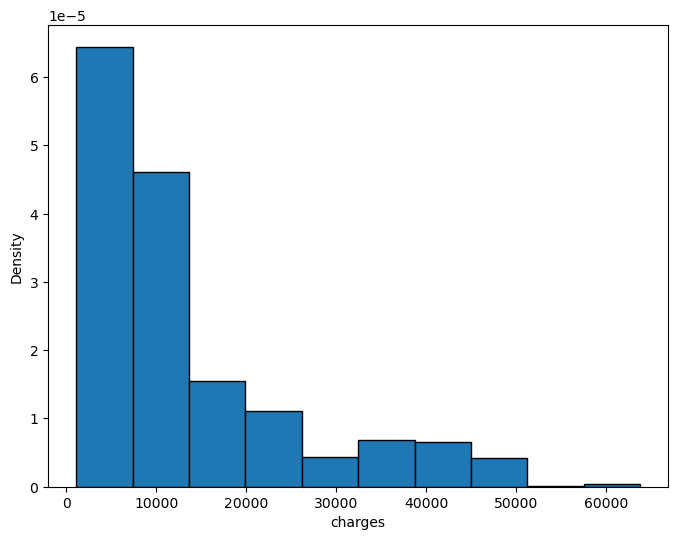

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    charges           8.878505
1        bmi           0.467290


age,sex,bmi,children,smoker,region,charges
38,male,29.26,2,no,northwest,6457.8434
26,male,29.45,0,no,northeast,2897.3235
26,male,30.0,1,no,southwest,2904.088
19,female,21.7,0,yes,southwest,13844.506
32,female,17.765,2,yes,northwest,32734.1863
32,female,37.145,3,no,northeast,6334.34355
49,female,27.17,0,no,southeast,8601.3293
49,male,25.84,1,no,northeast,9282.4806
61,female,28.2,0,no,southwest,13041.921
61,male,35.86,0,yes,southeast,46599.1084


Remaining Rows in the data: 1069                                                        
Remaining Columns in the data: 7


Analysis indicates all categorical columns are significant. No action Needed.           


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719267733741654"' - 4/20


region,sex,charges,smoker,children,bmi,id,age
southeast,male,18767.7377,yes,2,20.13,224,age_2
southeast,female,7345.7266,no,1,35.64,328,age_2
southeast,male,1391.5287,no,0,33.33,360,age_1
southeast,female,17085.2676,yes,1,26.84,368,age_1
southeast,male,2566.4707,no,2,31.13,488,age_1
southeast,female,3056.3881,no,2,31.79,496,age_1
southeast,female,1880.07,no,0,33.0,480,age_1
southeast,male,42560.4304,yes,2,38.06,240,age_2
southeast,male,42124.5153,yes,3,35.97,184,age_2
southeast,female,3392.3652,no,1,29.48,104,age_1


No information provided for Variable-Width Transformation.                               
Skipping customized string manipulation.⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾｜ 25% - 5/20


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719274059886823"' - 6/20


region,sex,bmi,charges,smoker,age,children,id
12533.008527680613,female,36.575,2136.88225,no,age_1,0,147
12533.008527680613,female,32.11,2130.6759,no,age_1,0,179
12533.008527680613,male,30.59,1639.5631,no,age_1,0,211
12533.008527680613,female,28.31,17468.9839,yes,age_1,0,235
12533.008527680613,female,28.88,17748.5062,yes,age_1,0,275
12533.008527680613,male,21.755,1627.28245,no,age_1,0,283
12533.008527680613,male,35.53,1646.4297,no,age_1,0,259
12533.008527680613,female,27.93,18838.70366,no,age_1,3,163
12533.008527680613,female,37.43,2138.0707,no,age_1,0,131
12533.008527680613,female,31.825,2719.27975,no,age_1,1,99


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265545752173"' - 6/20


['sex', 'smoker', 'age']


region,sex_0,sex_1,bmi,charges,smoker_0,smoker_1,age_0,age_1,age_2,children,id
14521.543532372873,1,0,31.79,3056.3881,1,0,1,0,0,2,496
14521.543532372873,1,0,32.45,45008.9555,0,1,0,0,1,0,616
14521.543532372873,1,0,38.06,12648.7034,1,0,0,0,1,0,624
14521.543532372873,1,0,24.53,12629.8967,1,0,0,0,1,0,648
14521.543532372873,0,1,34.43,1137.4697,1,0,1,0,0,0,720
14521.543532372873,1,0,38.28,1631.8212,1,0,1,0,0,0,728
14521.543532372873,1,0,26.73,1615.7667,1,0,1,0,0,0,712
14521.543532372873,0,1,40.92,48673.5588,0,1,0,0,1,0,536
14521.543532372873,0,1,31.13,2566.4707,1,0,1,0,0,2,488
14521.543532372873,0,1,33.33,1391.5287,1,0,1,0,0,0,360


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


Skipping customized anti-select columns.                                                 


Training size : 0.9                                                                       
Testing size  : 0.1                                                                       


region,sex_0,sex_1,bmi,charges,smoker_0,smoker_1,age_0,age_1,age_2,children,id
14521.543532372873,0,1,35.86,46599.1084,0,1,0,0,1,0,22
14521.543532372873,1,0,36.63,10381.4787,1,0,0,0,1,3,37
14521.543532372873,0,1,46.53,4686.3887,1,0,1,0,0,2,39
14521.543532372873,1,0,33.11,34439.8559,0,1,1,0,0,0,43
14521.543532372873,1,0,22.22,19444.2658,0,1,0,1,0,2,50
14521.543532372873,1,0,26.73,5002.7827,1,0,0,1,0,1,57
12533.008527680613,0,1,29.26,6457.8434,1,0,0,1,0,2,12
12533.008527680613,1,0,17.765,32734.1863,0,1,1,0,0,2,15
12533.008527680613,0,1,35.815,4320.41085,1,0,0,1,0,0,25
12533.008527680613,0,1,32.3,14119.62,1,0,0,0,1,2,30


region,sex_0,sex_1,bmi,charges,smoker_0,smoker_1,age_0,age_1,age_2,children,id
14521.543532372873,1,0,29.92,30942.1918,0,1,0,0,1,3,126
14521.543532372873,0,1,34.43,37742.5757,0,1,0,1,0,0,214
14521.543532372873,0,1,35.97,9386.1613,1,0,0,0,1,1,247
14521.543532372873,0,1,35.31,18806.14547,1,0,0,1,0,2,280
14521.543532372873,0,1,40.48,13831.1152,1,0,0,0,1,0,289
14521.543532372873,1,0,38.83,5138.2567,1,0,1,0,0,3,364
12533.008527680613,0,1,20.615,2803.69785,1,0,1,0,0,2,19
12533.008527680613,0,1,36.955,36219.40545,0,1,1,0,0,0,91
12533.008527680613,0,1,28.69,10264.4421,1,0,0,0,1,3,101
12533.008527680613,0,1,27.835,6455.86265,1,0,0,1,0,2,108


No information provided for customized outlier processing. AutoML will proceed with default settings.


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    charges           8.886810
1        bmi           0.467727


['bmi']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719268547214180"' - 11/20


region,sex_0,sex_1,bmi,charges,smoker_0,smoker_1,age_0,age_1,age_2,children,id
13289.583221840003,0,1,34.675,4518.82625,1,0,0,1,0,0,41
13289.583221840003,1,0,22.04,13616.3586,1,0,0,0,1,0,54
13289.583221840003,1,0,29.64,24671.66334,1,0,1,0,0,4,56
13289.583221840003,1,0,27.265,6555.07035,1,0,0,1,0,1,60
13289.583221840003,1,0,36.385,48517.56315,0,1,0,0,1,1,62
13289.583221840003,0,1,37.335,4667.60765,1,0,1,0,0,1,79
14521.543532372873,0,1,35.86,46599.1084,0,1,0,0,1,0,22
14521.543532372873,1,0,36.63,10381.4787,1,0,0,0,1,3,37
14521.543532372873,0,1,46.53,4686.3887,1,0,1,0,0,2,39
14521.543532372873,1,0,33.11,34439.8559,0,1,1,0,0,0,43


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265539332623"' - 12/20
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265523863927"'


['age_0', 'children', 'smoker_0', 'smoker_1', 'sex_1', 'age_2', 'region', 'bmi']


['children', 'region', 'bmi']


age_0,charges,smoker_0,smoker_1,sex_1,age_2,id,children,region,bmi
0,6496.886,1,0,0,0,10,-0.6,-0.9999999999999991,-0.29280106898279606
0,6457.8434,1,0,1,0,12,-0.2,-0.9750154268982524,-0.16853181894103875
0,8601.3293,1,0,0,1,13,-1.0,1.0000000000000009,-0.3081676966761314
1,32734.1863,0,1,0,0,15,-0.2,-0.9750154268982524,-0.9365291464840487
0,35491.64,0,1,1,0,17,-1.0,-0.9999999999999991,-0.06564222482044417
0,6067.1268,1,0,1,0,20,-0.6,-0.22358449704239547,-0.25104392851177554
1,2904.088,1,0,1,0,16,-0.6,-0.9999999999999991,-0.11909136462335052
1,13844.506,0,1,0,0,11,-1.0,-0.9999999999999991,-0.6736261900785034
0,18972.495,0,1,1,0,9,-0.2,1.0000000000000009,-0.433105060965425
1,2897.3235,1,0,1,0,8,-1.0,-0.22358449704239547,-0.15583764823784865


age_0,charges,smoker_0,smoker_1,sex_1,age_2,id,children,region,bmi
0,19214.7055,1,0,1,0,754,-1.0,1.0000000000000009,0.2944713546016368
0,7046.7222,1,0,0,0,1230,-0.6,1.0000000000000009,-0.3743110071822281
1,5138.2567,1,0,0,0,364,0.2,1.0000000000000009,0.47085351595122765
0,15820.699,0,1,1,0,84,-1.0,-0.9999999999999991,-0.8339736094872222
0,5472.449,1,0,0,0,206,-0.6,-0.9999999999999991,-0.3930182061132454
1,37484.4493,0,1,1,0,442,-0.2,1.0000000000000009,0.3532654083848339
1,4779.6023,1,0,0,0,417,-0.6,1.0000000000000009,-0.23467512944713542
0,13831.1152,1,0,1,1,289,-1.0,1.0000000000000009,0.5810923667947218
0,9386.1613,1,0,1,1,247,-0.6,1.0000000000000009,0.27977284115583767
0,37742.5757,0,1,1,0,214,-1.0,1.0000000000000009,0.17688324703524308


['age_1', 'age_0', 'children', 'smoker_0', 'smoker_1', 'age_2', 'sex_0', 'region', 'bmi']


['r_children', 'r_region', 'r_bmi']


r_age_0,r_smoker_0,r_smoker_1,r_age_2,charges,r_sex_0,r_age_1,id,r_children,r_region,r_bmi
0,1,0,0,6496.886,1,1,10,-0.6,-0.9999999999999991,-0.29280106898279606
0,1,0,0,6457.8434,0,1,12,-0.2,-0.9750154268982524,-0.16853181894103875
0,1,0,1,8601.3293,1,0,13,-1.0,1.0000000000000009,-0.3081676966761314
1,0,1,0,32734.1863,1,0,15,-0.2,-0.9750154268982524,-0.9365291464840487
0,0,1,0,35491.64,0,1,17,-1.0,-0.9999999999999991,-0.06564222482044417
0,1,0,0,6067.1268,0,1,20,-0.6,-0.22358449704239547,-0.25104392851177554
1,1,0,0,2904.088,0,0,16,-0.6,-0.9999999999999991,-0.11909136462335052
1,0,1,0,13844.506,1,0,11,-1.0,-0.9999999999999991,-0.6736261900785034
0,0,1,0,18972.495,0,1,9,-0.2,1.0000000000000009,-0.433105060965425
1,1,0,0,2897.3235,0,0,8,-1.0,-0.22358449704239547,-0.15583764823784865


r_age_0,r_smoker_0,r_smoker_1,r_age_2,charges,r_sex_0,r_age_1,id,r_children,r_region,r_bmi
0,1,0,0,19214.7055,0,1,754,-1.0,1.0000000000000009,0.2944713546016368
0,1,0,0,7046.7222,1,1,1230,-0.6,1.0000000000000009,-0.3743110071822281
1,1,0,0,5138.2567,1,0,364,0.2,1.0000000000000009,0.47085351595122765
0,0,1,0,15820.699,0,1,84,-1.0,-0.9999999999999991,-0.8339736094872222
0,1,0,0,5472.449,1,1,206,-0.6,-0.9999999999999991,-0.3930182061132454
1,0,1,0,37484.4493,0,0,442,-0.2,1.0000000000000009,0.3532654083848339
1,1,0,0,4779.6023,1,0,417,-0.6,1.0000000000000009,-0.23467512944713542
0,1,0,1,13831.1152,0,0,289,-1.0,1.0000000000000009,0.5810923667947218
0,1,0,1,9386.1613,0,0,247,-0.6,1.0000000000000009,0.27977284115583767
0,0,1,0,37742.5757,0,1,214,-1.0,1.0000000000000009,0.17688324703524308


['region', 'bmi', 'children']


age_1,age_0,smoker_0,charges,smoker_1,sex_1,age_2,sex_0,id,region,bmi,children
0,1,1,4686.3887,0,1,0,0,39,1.0000000000000009,0.9853014865542009,-0.2
1,0,0,19444.2658,1,0,0,1,50,1.0000000000000009,-0.6388842492066144,-0.2
1,0,1,5002.7827,0,0,0,1,57,1.0000000000000009,-0.33756472356773,-0.6
1,0,1,7682.67,0,0,0,1,58,1.0000000000000009,0.0813429096375481,0.2
0,1,1,2902.9065,0,1,0,0,72,1.0000000000000009,-0.17588107566393857,-0.6
0,0,1,8124.4084,0,1,1,0,77,1.0000000000000009,0.27242358443293807,-1.0
0,1,1,6334.34355,0,0,0,1,23,-0.2235844765744289,0.3582762652413566,0.2
1,0,1,7133.9025,0,0,0,1,28,-0.2235844765744289,-0.7905461833973609,-0.2
1,0,1,4518.82625,0,1,0,0,41,-0.2235844765744289,0.19325204609988297,-1.0
0,1,1,3490.5491,0,1,0,0,48,-0.2235844765744289,0.04726908301319547,-0.6


age_1,age_0,smoker_0,charges,smoker_1,sex_1,age_2,sex_0,id,region,bmi,children
0,0,1,14235.072,0,0,1,1,94,-0.9999999999999991,0.48889260063470874,-0.2
0,0,1,10959.33,0,1,1,0,186,-0.9999999999999991,-0.5400033405712377,-1.0
1,0,1,5472.449,0,0,0,1,206,-0.9999999999999991,-0.3930182061132454,-0.6
1,0,1,6250.435,0,1,0,0,256,-0.9999999999999991,-0.5734090529480541,-1.0
1,0,1,6282.235,0,1,0,0,261,-0.9999999999999991,-0.19926507432770993,-0.6
0,1,1,4830.63,0,0,0,1,336,-0.9999999999999991,0.3485886086520796,1.0
0,1,1,2803.69785,0,1,0,0,19,-0.9750153816350485,-0.7461165859361951,-0.2
0,1,0,36219.40545,1,1,0,0,91,-0.9750153816350485,0.345582094538166,-1.0
0,0,1,10264.4421,0,1,1,0,101,-0.9750153816350485,-0.2066143310506095,0.2
1,0,1,6455.86265,0,1,0,0,108,-0.9750153816350485,-0.26373809921496566,-0.2


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6']


                                                                                          
Skipping customized hyperparameter tuning


response_column : charges                                                                                                                             
name : xgboost
model_type : Regression
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.3)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
iter_num : (10, 20, 30)
seed : 42
Total number of models for xgboost : 2592
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : charges
name : knn
model_type : Regression
k : (3, 5, 6, 8, 10, 12)
id_column : id
voting_weight : 1.0
Total number of models for knn : 6
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------



result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719267340111396"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719269073743729"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719267095194951"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719271187334060"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719267140457241"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719270361703130"'


,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,KNN_1,rfe,3552.115821,3.038980e+07,0.258922,5512.694527,0.508844,0.695150,0.666865
1,2,XGBOOST_1,rfe,3316.668464,3.143920e+07,0.284397,5607.066653,0.533288,0.684623,0.655361
2,3,XGBOOST_0,lasso,3587.948716,3.305547e+07,0.320372,5749.388936,0.566015,0.668410,0.641341
3,4,XGBOOST_2,pca,4676.902757,6.131188e+07,0.301497,7830.190155,0.549087,0.384961,0.341473


In [16]:
# Fitting train data
aml.fit(insurance_df_train, insurance_df_train.charges)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,KNN_1,rfe,3552.115821,3.038980e+07,0.258922,5512.694527,0.508844,0.695150,0.666865
1,2,XGBOOST_1,rfe,3316.668464,3.143920e+07,0.284397,5607.066653,0.533288,0.684623,0.655361
2,3,XGBOOST_0,lasso,3587.948716,3.305547e+07,0.320372,5749.388936,0.566015,0.668410,0.641341
3,4,XGBOOST_2,pca,4676.902757,6.131188e+07,0.301497,7830.190155,0.549087,0.384961,0.341473


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,KNN_1,rfe,3552.115821,3.038980e+07,0.258922,5512.694527,0.508844,0.69515,0.666865


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [21]:
# Generating prediction and metrics on test data
prediction = aml.predict(insurance_df_test)

Data Transformation started ...


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719266163038291"'⫾⫾⫾｜ 33% - 5/15


region,sex,charges,smoker,children,bmi,id,age
northeast,female,4561.1885,no,4,31.35,216,age_1
northeast,female,11657.7189,no,0,28.31,272,age_3
northeast,female,11658.11505,no,0,28.595,280,age_3
northeast,male,11763.0009,no,1,32.11,288,age_3
northeast,female,13430.265,no,3,32.3,320,age_3
northeast,female,11658.37915,no,0,28.785,328,age_3
northwest,female,14711.7438,yes,0,22.42,120,age_1
northwest,female,11454.0215,no,0,25.65,312,age_3
northwest,male,43921.1837,yes,0,33.63,336,age_3
northwest,female,3594.17085,no,1,22.515,352,age_1


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719266907215352"'⫾⫾⫾｜ 46% - 7/15


region,sex,bmi,charges,smoker,age,children,id
12507.852881471696,male,27.1,19040.876,yes,age_1,1,89
12507.852881471696,male,34.7,6082.405,no,age_2,2,52
12507.852881471696,female,30.5,10704.47,no,age_3,0,76
12507.852881471696,male,34.4,36197.699,yes,age_1,0,116
12507.852881471696,female,22.6,18608.262,yes,age_2,2,30
12507.852881471696,male,33.4,38415.474,yes,age_2,2,46
12533.008527680613,male,33.63,43921.1837,yes,age_3,0,336
12533.008527680613,female,30.115,16455.70785,no,age_3,3,81
12533.008527680613,female,26.695,4571.41305,no,age_1,0,97
12533.008527680613,male,24.605,5257.50795,no,age_1,2,113


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719268136685677"'⫾⫾⫾｜ 46% - 7/15


region,sex_0,sex_1,bmi,charges,smoker_0,smoker_1,age_0,age_1,age_2,children,id
12533.008527680613,1,0,33.535,12269.68865,1,0,0,0,1,2,92
12533.008527680613,1,0,25.935,4133.64165,1,0,1,0,0,1,70
12533.008527680613,0,1,33.82,19673.33573,1,0,1,0,0,0,78
12533.008527680613,1,0,26.315,5312.16985,1,0,1,0,0,3,86
12533.008527680613,0,1,25.935,4239.89265,1,0,1,0,0,1,214
12533.008527680613,0,1,28.595,4243.59005,1,0,1,0,0,1,246
12533.008527680613,1,0,27.645,11305.93455,1,0,0,0,1,1,206
12533.008527680613,1,0,26.03,3736.4647,1,0,1,0,0,0,132
12533.008527680613,1,0,40.565,6373.55735,1,0,0,1,0,1,12
12533.008527680613,1,0,26.695,4571.41305,1,0,1,0,0,0,97


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719269938154080"'⫾⫾⫾｜ 73% - 11/15


id,age_0,children,smoker_0,smoker_1,sex_1,age_2,region,bmi,charges
26,0,2,1,0,1,0,12533.0085,32.3,6986.697
186,0,3,1,0,1,0,12533.0085,30.875,6796.8633
202,0,3,1,0,0,0,12533.0085,27.74,7281.5056
37,0,1,1,0,0,0,12533.0085,28.31,7153.5539
85,0,2,1,0,1,0,12533.0085,37.05,7265.7025
149,0,0,1,0,0,0,12533.0085,36.575,8671.1912
132,1,0,1,0,0,0,12533.0085,26.03,3736.4647
78,1,0,1,0,1,0,12533.0085,33.82,19673.3357
86,1,3,1,0,0,0,12533.0085,26.315,5312.1699
206,0,1,1,0,0,1,12533.0085,27.645,11305.9345


age_0,charges,smoker_0,smoker_1,sex_1,age_2,id,children,region,bmi
0,6986.697,1,0,1,0,26,-0.2,-0.9750154268982524,0.034574912310004896
0,6796.8633,1,0,1,0,186,0.2,-0.9750154268982524,-0.06063136796392176
0,7281.5056,1,0,0,0,202,0.2,-0.9750154268982524,-0.27008518456656094
0,7153.5539,1,0,0,0,37,-0.6,-0.9750154268982524,-0.23200267245699016
0,7265.7025,1,0,1,0,85,-0.2,-0.9750154268982524,0.351929179889761
0,8671.1912,1,0,0,0,149,-1.0,-0.9750154268982524,0.32019375313178583
1,3736.4647,1,0,0,0,132,-1.0,-0.9750154268982524,-0.384332720895273
1,19673.3357,1,0,1,0,78,-1.0,-0.9750154268982524,0.13612827793552706
1,5312.1699,1,0,0,0,86,0.2,-0.9750154268982524,-0.3652914648404876
0,11305.9345,1,0,0,1,206,-0.6,-0.9750154268982524,-0.27643226991815595


id,age_1,age_0,children,smoker_0,smoker_1,age_2,sex_0,region,bmi,charges
26,1,0,2,1,0,0,0,12533.0085,32.3,6986.697
186,1,0,3,1,0,0,0,12533.0085,30.875,6796.8633
202,1,0,3,1,0,0,1,12533.0085,27.74,7281.5056
37,1,0,1,1,0,0,1,12533.0085,28.31,7153.5539
85,1,0,2,1,0,0,0,12533.0085,37.05,7265.7025
149,1,0,0,1,0,0,1,12533.0085,36.575,8671.1912
132,0,1,0,1,0,0,1,12533.0085,26.03,3736.4647
78,0,1,0,1,0,0,0,12533.0085,33.82,19673.3357
86,0,1,3,1,0,0,1,12533.0085,26.315,5312.1699
206,0,0,1,1,0,1,1,12533.0085,27.645,11305.9345


r_age_0,r_smoker_0,r_age_2,r_smoker_1,charges,r_sex_0,r_age_1,id,r_children,r_region,r_bmi
0,1,0,0,6986.697,0,1,26,-0.2,-0.9750154268982524,0.034574912310004896
0,1,0,0,6796.8633,0,1,186,0.2,-0.9750154268982524,-0.06063136796392176
0,1,0,0,7281.5056,1,1,202,0.2,-0.9750154268982524,-0.27008518456656094
0,1,0,0,7153.5539,1,1,37,-0.6,-0.9750154268982524,-0.23200267245699016
0,1,0,0,7265.7025,0,1,85,-0.2,-0.9750154268982524,0.351929179889761
0,1,0,0,8671.1912,1,1,149,-1.0,-0.9750154268982524,0.32019375313178583
1,1,0,0,3736.4647,1,0,132,-1.0,-0.9750154268982524,-0.384332720895273
1,1,0,0,19673.3357,0,0,78,-1.0,-0.9750154268982524,0.13612827793552706
1,1,0,0,5312.1699,1,0,86,0.2,-0.9750154268982524,-0.3652914648404876
0,1,1,0,11305.9345,1,0,206,-0.6,-0.9750154268982524,-0.27643226991815595


age_1,age_0,charges,smoker_0,smoker_1,sex_1,age_2,sex_0,id,region,bmi,children
1,0,6986.697,1,0,1,0,0,26,-0.9750154091274671,0.034574912310004896,-0.2
1,0,6796.8633,1,0,1,0,0,186,-0.9750154091274671,-0.06063136796392176,0.2
1,0,7281.5056,1,0,0,0,1,202,-0.9750154091274671,-0.27008518456656094,0.2
1,0,7153.5539,1,0,0,0,1,37,-0.9750154091274671,-0.23200267245699016,-0.6
1,0,7265.7025,1,0,1,0,0,85,-0.9750154091274671,0.351929179889761,-0.2
1,0,8671.1912,1,0,0,0,1,149,-0.9750154091274671,0.32019375313178583,-1.0
0,1,3736.4647,1,0,0,0,1,132,-0.9750154091274671,-0.384332720895273,-1.0
0,1,19673.3357,1,0,1,0,0,78,-0.9750154091274671,0.13612827793552706,-1.0
0,1,5312.1699,1,0,0,0,1,86,-0.9750154091274671,-0.3652914648404876,0.2
0,0,11305.9345,1,0,0,1,1,206,-0.9750154091274671,-0.27643226991815595,-0.6


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,charges
0,175,-0.770142,0.671868,0.521479,0.048138,-0.816196,-0.060349,-0.346000,6710.1919
1,132,-0.763231,-0.598706,-0.928177,0.242607,0.052345,-0.305015,-0.059014,3736.4647
2,283,-0.653826,-0.452615,0.869602,1.145313,0.311292,-0.346274,0.257270,39725.5180
3,78,-0.588051,0.789345,-0.843726,-0.107676,-0.064668,-0.263046,0.351137,19673.3357
4,26,-0.705129,0.687312,0.552833,-0.027791,-0.808021,0.018577,0.157359,6986.6970
5,86,-0.822276,-0.577105,-0.648558,0.406975,-0.231283,0.805128,-0.194449,5312.1699
6,50,-0.718710,-0.674225,0.443620,0.101957,-0.578619,-0.221149,0.891148,28476.7350
7,206,-0.830598,-0.765678,0.147061,-0.588339,0.428434,0.061251,-0.189481,11305.9345
8,186,-0.737496,0.691499,0.639922,0.041814,-0.904159,0.373225,0.013997,6796.8633
9,246,-0.652131,0.785998,-0.771932,-0.001033,-0.164794,0.053101,-0.037766,4243.5900


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 15/15            

Following model is being used for generating prediction :
Model ID : KNN_1 
Feature Selection Method : rfe

Prediction : 
   id    prediction    charges
0  22   6363.857843  4883.8660
1   8   4966.361457  3392.9768
2  18   7563.874503  6610.1097
3  12   6816.002338  6373.5574
4  41  13971.642533  5594.8455
5  48   3323.587298  3410.3240
6   9   6053.211447  3935.1799
7  11   4722.283056  1263.2490
8  28   7651.104969  6079.6715
9  31   3247.089393  4544.2348

Performance Metrics : 
           MAE           MSE      MSLE       MAPE        MPE         RMSE     RMSLE            ME        R2        EV          MPD       MGD
0  3862.601327  3.645630e+07  0.260947  40.659354 -23.639828  6037.904959  0.510829  25608.380122  0.745668  0.745868  2791.913497  0.346978


In [22]:
# Printing prediction
prediction.head()

id,prediction,charges
10,22643.909454739543,7173.36
12,6816.002337846883,6373.5574
13,13668.268482707004,11552.904
14,14165.984896260547,12950.0712
16,4132.596643533877,2699.5684
17,7841.340417374437,6753.038
15,2907.061703933909,4357.0436
11,4722.283055803806,1263.249
9,6053.211447159419,3935.1799
8,4966.361456785501,3392.9768


In [23]:
remove_context()

True